# Installed Library

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Data Exploration

In [60]:
data = pd.read_csv('crop_data.csv')
print(data.sample(10))

     temp   rh  precip  elevation  slope        crop
418  27.9   78   103.9         81      8       cacao
108  24.5   84   230.4        378      2        rice
654  27.1   91   224.7         67     12     coconut
413  21.6   85   100.2        388      8       cacao
553  24.7   83    57.1         76      3  watermelon
282  26.7   51   126.8        623     19      coffee
529  24.9   87    49.5         57      6  watermelon
843  32.0   50    91.7        364      1       mango
594  26.3   87    54.4         70      5  watermelon
694  27.6  100   174.6         73      9     coconut


In [61]:
print(data.shape)

(1006, 6)


In [62]:
print(data.describe())

              temp           rh       precip    elevation        slope
count  1006.000000  1006.000000  1006.000000  1006.000000  1006.000000
mean     26.326441    72.557654   119.679622   208.155070     7.086481
std       3.339067    14.275546    55.903508   157.920667     6.356372
min      18.000000    44.000000     9.000000    43.000000     0.000000
25%      24.400000    61.000000    86.300000    77.000000     2.000000
50%      26.100000    76.000000   105.750000   161.000000     6.000000
75%      28.000000    83.000000   144.700000   311.000000    11.000000
max      36.000000   100.000000   298.600000   776.000000    37.000000


In [63]:
 print(len(data['crop'].unique()))

10


In [64]:
print(data.isnull().sum())

temp         0
rh           0
precip       0
elevation    0
slope        0
crop         0
dtype: int64


In [65]:
print(data.dtypes)

temp         float64
rh             int64
precip       float64
elevation      int64
slope          int64
crop          object
dtype: object


# Data Visualization

###### Class Distribution

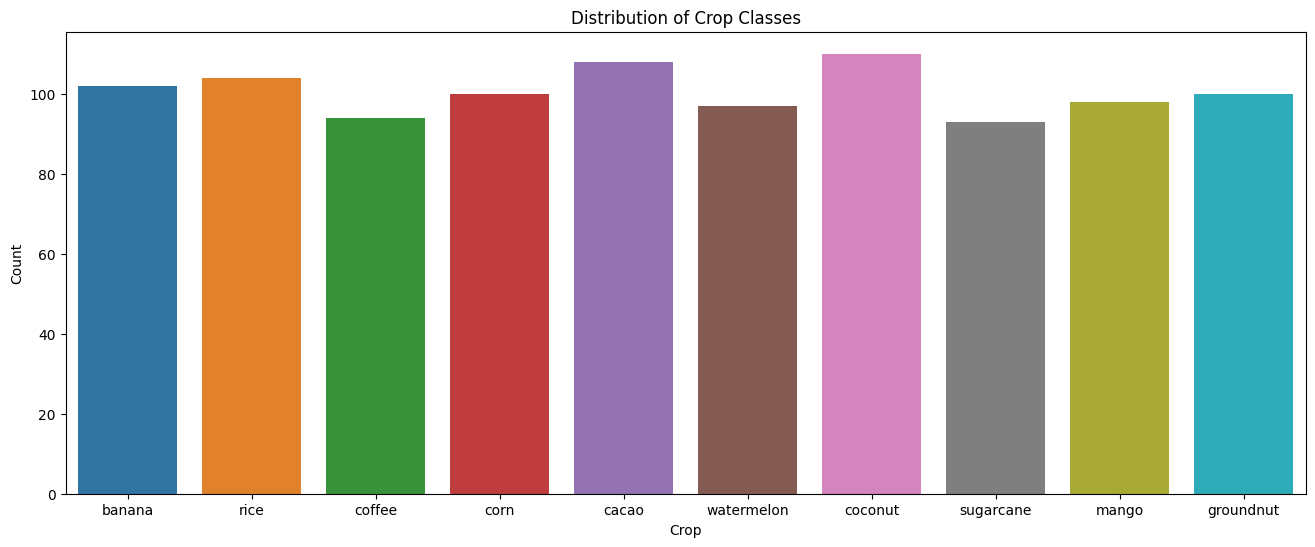

In [66]:
plt.figure(figsize=(16, 6))
sns.countplot(x='crop', data=data, hue='crop', palette='tab10')
plt.title('Distribution of Crop Classes')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.show()

###### Feature Comparison (Elevation vs Precipitation)

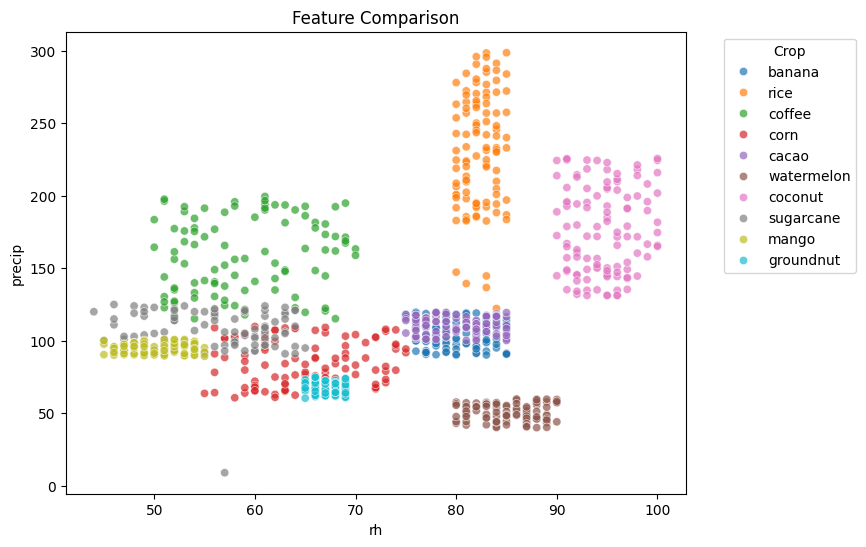

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='rh', y='precip', hue='crop', palette='tab10', alpha=0.7)
plt.title('Feature Comparison')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###### Correlation Matrix

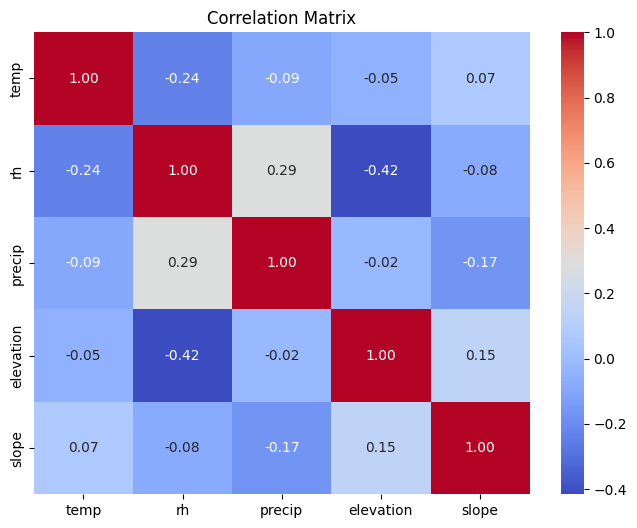

In [68]:
correlation_matrix = data[['temp', 'rh', 'precip', 'elevation', 'slope']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

In [69]:
X = data[['temp', 'rh', 'precip', 'elevation', 'slope']]
y = data['crop']

feature_names = X.columns

###### Label Encoder

In [70]:

label_encoder = LabelEncoder()
data['crop_encoded'] = label_encoder.fit_transform(y.values)

original_classes = label_encoder.classes_
label_mapping = pd.DataFrame({
    'Label': range(len(original_classes)),
    'Crop': original_classes
})

print("\nLabel Encoding:")
print(label_mapping.to_string(index=False))


Label Encoding:
 Label       Crop
     0     banana
     1      cacao
     2    coconut
     3     coffee
     4       corn
     5  groundnut
     6      mango
     7       rice
     8  sugarcane
     9 watermelon


###### Standard Scaler

In [71]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X.values)

###### Yeo-Johnson Power Transformation

In [72]:
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X_normalized)

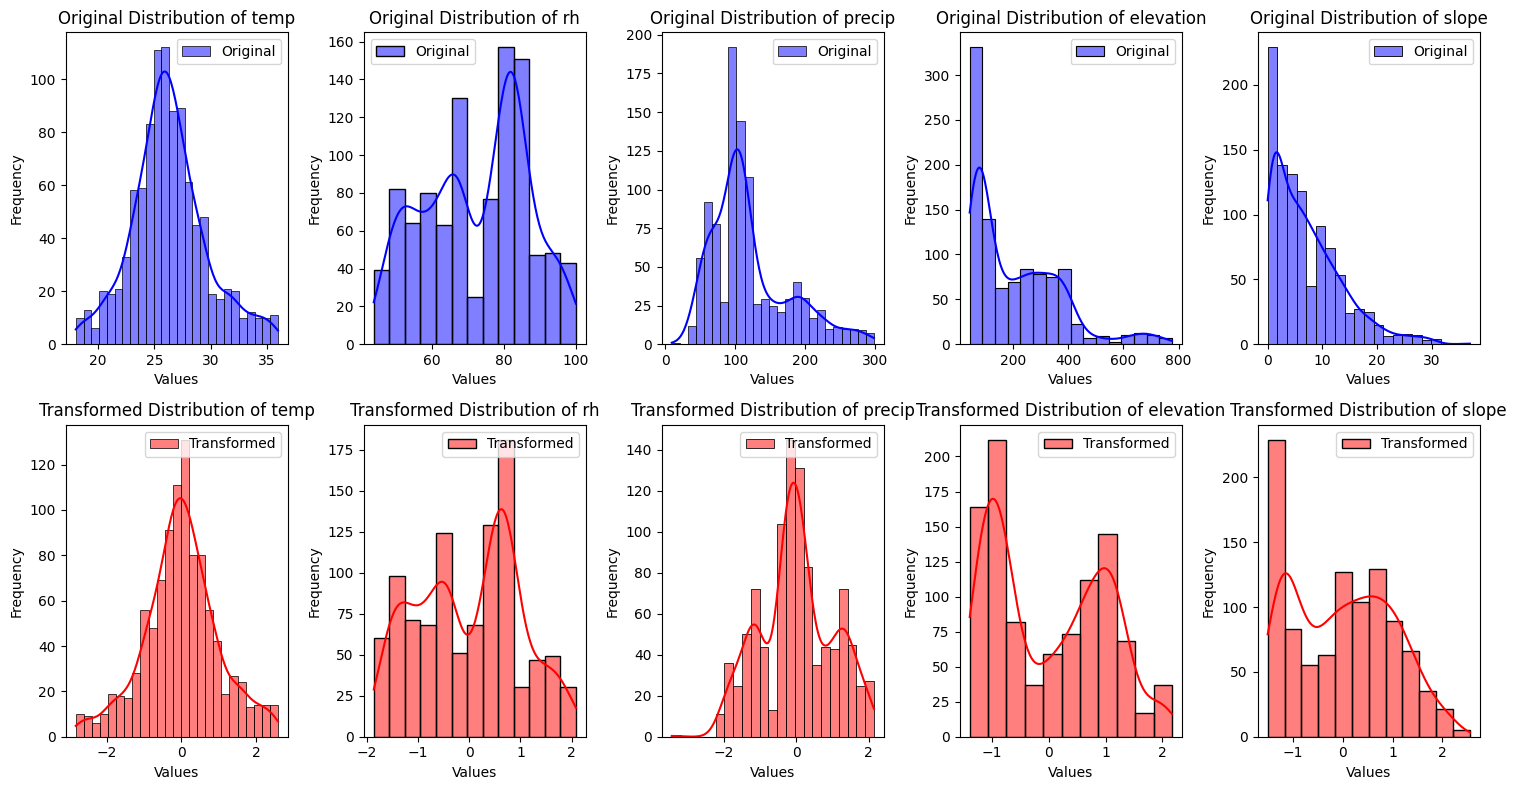

In [73]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(X.columns):
    plt.subplot(2, 5, i + 1)
    sns.histplot(X[column], kde=True, color='blue', label='Original')
    plt.title(f'Original Distribution of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

for i, column in enumerate(X.columns):
    plt.subplot(2, 5, i + 6)
    sns.histplot(X_transformed[:, i], kde=True, color='red', label='Transformed')
    plt.title(f'Transformed Distribution of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()

# Model Building

###### Data Splitting

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

###### Training

In [75]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

###### Testing

In [76]:
y_pred = gnb.predict(X_test)

# Model Evaluation

###### Accuracy, Precision, Recall, and F1 Score

In [77]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9653
Precision: 0.9674
Recall: 0.9653
F1 Score: 0.9654


###### Confusion Matrix

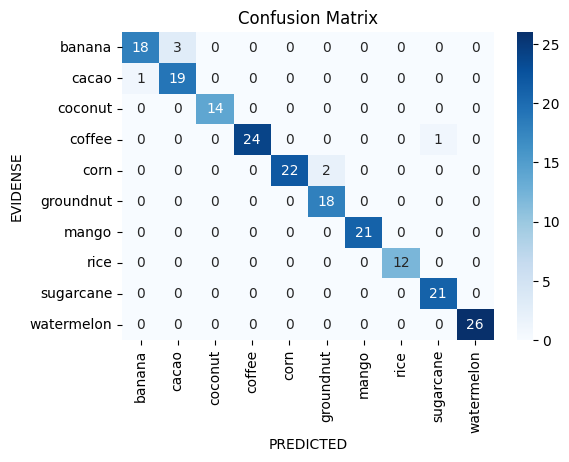

In [84]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('PREDICTED')
plt.ylabel('EVIDENSE')
plt.title("Confusion Matrix")
plt.show()

###### Cross Validation (5-Folds)

In [79]:
cv_scores = cross_val_score(gnb, X_transformed, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.95544554 0.960199   0.95522388 0.96517413 0.95522388]
Mean CV Score: 0.9582532880153687


# New Data Prediction

In [82]:
new_data = np.array([[26.9, 90, 112.3, 300, 3]])
new_data_scaled = scaler.transform(new_data)
new_data_transformed = pt.transform(new_data_scaled)
probabilities = gnb.predict_proba(new_data_transformed)[0]

crop_labels = {0: 'banana', 1: 'cacao', 2: 'coconut', 3: 'coffee', 4: 'corn',
               5: 'groundnut', 6: 'mango', 7: 'rice', 8: 'sugarcane', 9: 'watermelon'}

top_5_indices = np.argsort(probabilities)[-5:][::-1]
top_5_crops = [(crop_labels[i], probabilities[i]) for i in top_5_indices]

print("Top 5 Recommended Crops:")
for crop, likelihood in top_5_crops:
    print(f"{crop}: {likelihood:%}")

Top 5 Recommended Crops:
cacao: 63.002449%
banana: 36.996170%
corn: 0.001307%
coffee: 0.000074%
rice: 0.000001%
